# Matplotlib – Advanced Histogram With Counts And Bin Ranges
https://analyticsinsightsninja.wordpress.com/2019/05/08/matplotlib-advanced-histogram-with-counts-and-bin-ranges/

This is not the usual basic how to draw a histogram in Python blog. This blog is about some advanced histogram techniques to display bar/bin counts, bin ranges, colour the bars to separate percentiles and generate custom legends.  
There are several excellent blogs and help about how to draw a histogram. But it is very difficult to find information on:  
1. How to display the data point count for each bar in the histogram?
2. How to display the bar/bin range in the X axis of the histogram?
3. How to change the colour of the bar/bins in the histogram based on the percentile?
4. How to generate custom legends?

In this blog lets explore how to achieve the above.

## Notes on code
The important line of the code is:  
counts, bins, patches = ax.hist(data, facecolor=perc_50_colour, edgecolor=’gray’)  
which returns the following:  
counts = numpy.ndarray of count of data ponts for each bin/column in the histogram  
bins = numpy.ndarray of bin edge/range values   
patches = a list of Patch objects. Each Patch object contains a Rectnagle object.  e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)  
By manipulating these three collections, we can get very useful information about the histogram.

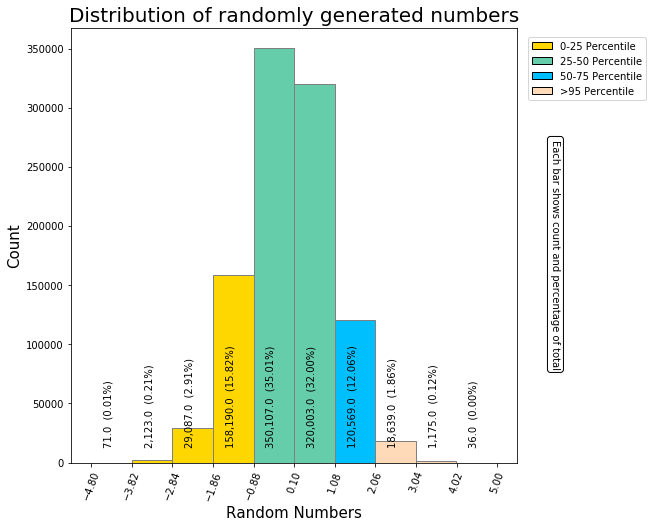

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000000)

# Colours for different percentiles
perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(8,8))

'''
counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
bins    = numpy.ndarray of bin edge/range values
patches = a list of Patch objects.
        each Patch object contains a Rectnagle object. 
        e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
'''
counts, bins, patches = ax.hist(data, facecolor=perc_50_colour, edgecolor='gray')


# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Set the graph title and axes titles
plt.title('Distribution of randomly generated numbers', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Random Numbers', fontsize=15)

# Change the colors of bars at the edges
twentyfifth, seventyfifth, ninetyfifth = np.percentile(data, [25, 75, 95])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

# Annotation for bar values
ax.annotate('Each bar shows count and percentage of total',
            xy=(.85,.30), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=10, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

# Display the graph
plt.show()


The code was inspired by an answer provided by Joe Kington at stackoverflow. 
https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin?rq=1  
I have made further enhancements and added code to display bar counts and percentages in the bar so  it can scale for larger number display. I have also added legend for the percentile colour.

## Caveats
Though this will work for most cases, if there are large number of bars/bins then the text will overlap so much that it is not useful at all.  
Also if the data is heavily skewed, either positively or negatively, and has extreme outliers then the graph may not display all the percentiles.  

# Alternate histogram with category colouring
https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-legend  
Answer by ImportanceOfBeingErnest

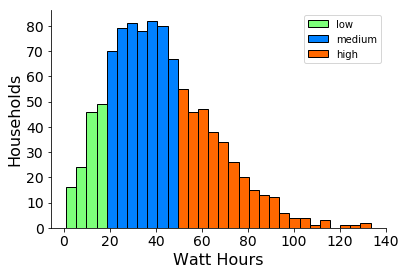

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

data = np.random.rayleigh(size=1000)*35

N, bins, patches = plt.hist(data, 30, ec="k")

cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.25)
high = cmap(0.8)


for i in range(0,4):
    patches[i].set_facecolor(low)
for i in range(4,11):
    patches[i].set_facecolor(medium)
for i in range(11,30):
    patches[i].set_facecolor(high)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,medium, high]]
labels= ["low","medium", "high"]
plt.legend(handles, labels)

plt.xlabel("Watt Hours", fontsize=16)  
plt.ylabel("Households", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

plt.gca().spines["top"].set_visible(False)  
plt.gca().spines["right"].set_visible(False)

plt.show()